# What you'll learn

After watching this video, you will be able to:
* Describe how to use the Tekton catalog.
* Explain how to create a workspace for tasks.
* Describe how to use tasks from the Tekton catalog in a Tekton pipeline.

# What is the Tekton catalog?

* The **Tekton catalog**, also known as the **Tekton Hub**, is a repository of Tekton tasks that have been contributed by the community, representing a collection of reusable parts that you can use to build a CI/CD pipeline.
* It’s located at `hub.tekton.dev`.
* Before writing your own tasks, you should always check the Tekton catalog to see if someone else has already written one that you can use.
* This not only saves hours of creating and debugging tasks, but many more hours of task maintenance as well.
* **Remember:** A line of code that you didn’t write is a line of code that you don't have to maintain.

# Categories of Tasks

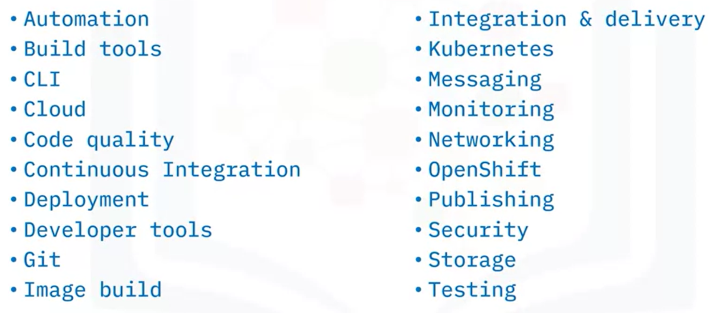

The task categories available at the **Tekton Hub** include: 
* automation,
* build tools,
* code quality,
* continuous integration,
* developer tools like Git,
* building images,
* Kubernetes and open shift tasks,
* networking,
* monitoring,
* security,
* publishing, just to name a few.

As mentioned previously, you should always check the Tekton Hub before you start to write any task, because chances are, someone has already written one that you can use.

# Task details

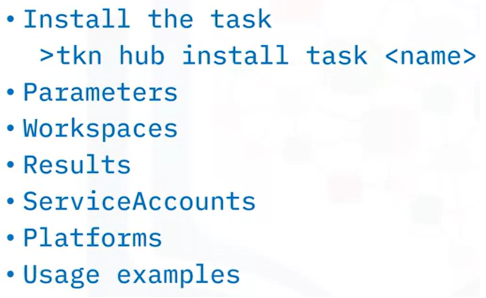

* When you select a **task** and **view the details**, you see instructions on **how to install the task**.
* These are usually in the form of a Kubernetes manifest written in YAML that you can apply with the `kubectl` command.
* But it's important to also point out that you can also easily install tasks from the hub using the **Tekton CLI** tool, simply by using: `tkn hub install task`, followed by the task name.
* The details also document any parameters that the task needs including:
    * what the name is,
    * what the type is, and
    * hints on what the various values might be.
* The details also tell you if the task requires any workspaces to share data with other tasks.
* We'll discuss workspaces in just a moment.
* If the task produces any results, they will be documented in the details, as well as if the **task requires a service account with special run permissions**.
* Finally, the details include information on the platforms that the task can run on, and some even give helpful usage examples.

## Search for "git"

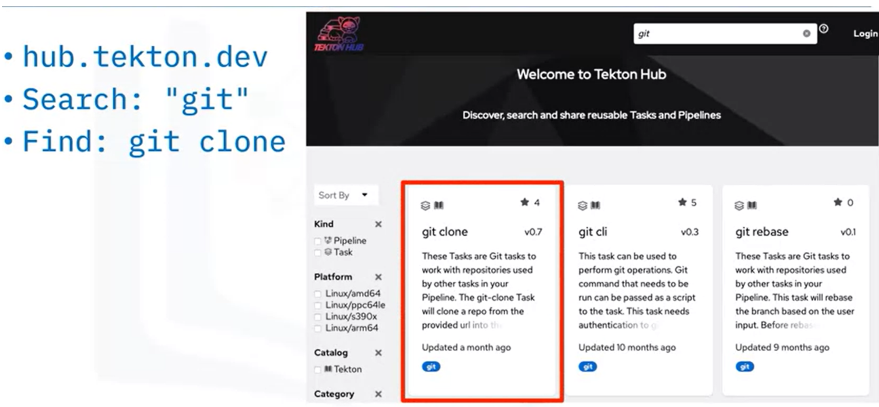

Probably the first thing you need to do in your pipeline is use **git to clone your source code** so that it can be built, and other checks can be run on it.
* You go to `hub.tekton.dev`, you type **"git"** in the search box.
* This returns several results, one of which is a task called **"git clone"**.
* That looks like the exact task you need.
* So, you select it to view the details.

## Example git-clone instructions

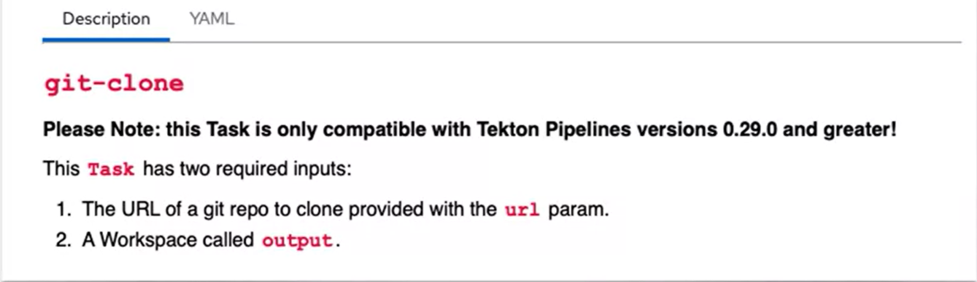

* The details page gives you all the information needed to use the task in your pipeline.
* Some tasks like `git-clone` have a lot of optional parameters but don't be overwhelmed.
* When you look at the overview, you see that the `git-clone` task **only requires two inputs**.
* The `URL` of the repository that you want to clone, and a `workspace` called **"output"** to clone the source code into.

Let's see how you can use this information to implement this task in a pipeline.

# What is a workspace?

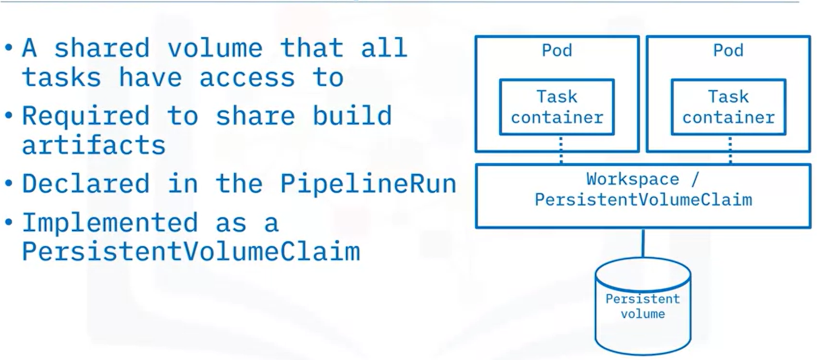

* One of the two inputs is a `workspace`.
* But **what is a workspace?** 
* Remember that with Tekton, 
    * each task runs in its own pod.
    * every pod is isolated from every other pod.
* That makes it difficult to transfer data between tasks.
* You solve this problem by providing **a workspace that is a shared volume that each task has access to**.
* This allows them to share data through this volume.
* If you think about it, this is required for sharing build artifacts.
* You can't lint your code without cloning it from Git first, and so there must be a way to share the code, and a workspace is the answer.
* Workspaces are declared in the PipelineRun.
* Because they are implemented as a **Kubernetes `PersistentVolumeClaim`**, it is up to the `PipelineRun` to map from the name of the `workspace` that the pipeline is expecting to a `PersistentVolumeClaim` that the pipeline can use to store its artifacts.

# Defining a workspace

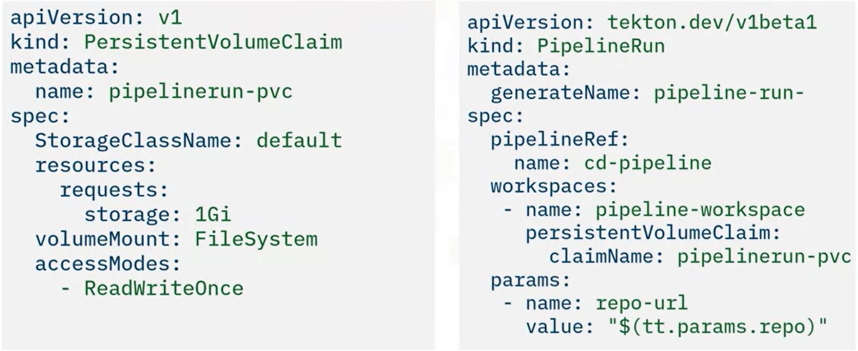

Let’s take a look at how this is done.

First, you need to create a `PersistentVolumeClaim`.
* You give it the name **“pipelinerun-pvc”**.
* Then you `spec` it out using the `default` **storage class**, `requests` **1 gigabyte** of storage and mount it as a `FileSystem` that is `ReadWriteOnce`.

Now you’re ready to create a `PipelineRun`.
* You configure it to **generate a unique name** so that every run can be uniquely identified.
* In the `spec`, you add a reference to the pipeline that you want to run.
* In this example, it’s a pipeline named **"cd-pipeline"**.
* Then, you declare the **workspace** by giving it a name, and mapping it to the `PersistentVolumeClaim` (or **PVC**) that you want to use.
* From this point forward, the pipeline can reference it by the name **"pipeline-workspace"** and Kubernetes will know to mount the PVC named **"pipelinerun-pvc”** to each of the pods.
* Finally, you pass on any parameters that the pipeline requires.
* In this example, it’s a parameter named **"repo-url"**.

# Example git-clone

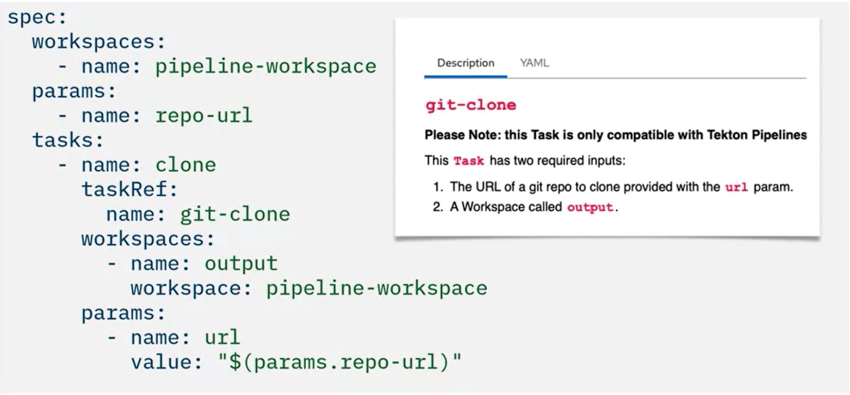

Now, let's take a look at how to write the pipeline task using the `git-clone` task from the **Tekton catalog**.
* You start with the pipeline `spec` and define that a `workspace` named **"pipeline-workspace"** is required so that any of the tasks that need it can use it.
* Next, you declare that a parameter named **"repo-url"** must be passed into the pipeline so that it can be used by any task that needs it.
* Then, you start defining your tasks.
* You create a task named **"clone"** because this is the task that will clone your source code.
* You set the `taskRef` to point to the **"git-clone"** task that you installed from the **Tekton catalog**.
* If you remember, the `git-clone` task requires a `workspace` named **"output"**, so you define a mapping from the workspace named **"pipeline-workspace"** to a workspace named **"output"** for this task.
* Other tasks can use different workspace names and they can all be mapped back to the single workspace that this pipeline is using.
* Also remember, that the `git-clone` task requires that a parameter named **"url"** be set to the url of the git repository that you want to clone.
* So you map the **"repo-url"** parameter from the pipeline into the **"url"** parameter that the task requires.
* The task is complete and ready to run.

**Let's review where everything came from.**
* From the details of the `git-clone` task on **Tekton Hub**, you saw that you needed a `workspace` named **"output"**, so you defined this for the task.
* The details also said that a parameter named **"url"** must be passed in, so you defined this for the task also.
* The `workspace` in the task was mapped to the `pipeline-workspace` from the pipeline `spec`.
* The `url` parameter in the task was mapped to the pipeline parameter `repo-url` from the pipeline `spec`.

# Summary

You learned that:
* The **Tekton catalog**, or **Tekton Hub**, can be used to find reusable tasks for your CI/CD pipelines.
* Each task defines the **parameters** and **workspaces** it needs in order to run.
* The `PipelineRun` must map the workspace to a `PersistentVolumeClaim`.
* The parameters can be mapped from the pipeline to the task as needed.